In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline 
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

os.getcwd()
os.chdir("/Users/riccardo/Dropbox/A-Data/Paperopoli")
data = pd.read_csv('PluviometriaPaperopoli_4.txt')
map(datetime,data['anno'])
data=data.set_index('anno')

In [2]:
data[-5:]

,1h,3h,6h,12h,24h
anno,,,,,
1984,61.2,61.4,61.4,62.6,81.8
1985,23.6,35.6,44.2,58.6,69.8
1986,20.2,36.8,51.4,55.8,74.4
1987,32.6,40.6,64.6,77.2,81.2
1988,89.2,102.0,102.0,102.0,104.2


In [3]:
from scipy.stats import norm
from scipy.stats import genextreme,gumbel_r
from numpy import linspace
from pylab import plot,show,hist,figure,title

In [4]:
best=pd.read_pickle("abs_mle")
best

,1h,3h,6h,12h,24h
a,31.59042,39.527315,48.100316,60.562103,75.848891
b,9.07316,10.041456,12.398915,18.005471,22.435148


In [5]:
def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

In [6]:
def h_g(bs,col,tr):
    return bs[col]["a"]+bs[col]["b"]*(-math.log(-math.log(1-1/tr)))

In [7]:
[qtls(best["1h"],0.9),qtls(best["3h"],0.9),qtls(best["6h"],0.9),qtls(best["12h"],0.9),
 qtls(best["24h"],0.9)]

[52.00836207310437,
 62.12427880206336,
 76.00242956133329,
 101.08102667450524,
 126.33621400150082]

In [8]:
[h_g(best,"1h",10),h_g(best,"3h",10),h_g(best,"6h",10),h_g(best,"12h",10),h_g(best,"24h",10)]

[52.00836207310437,
 62.12427880206336,
 76.00242956133329,
 101.08102667450524,
 126.33621400150082]

In [9]:
Tr=10
q10=1-1/Tr
q20=1-1/20
q100=1-1/100

    
def qtls(df,qu):
    rv1h=gumbel_r(loc=df["a"],scale=df["b"])
    return rv1h.ppf(qu)

pts=DataFrame([[qtls(best["1h"],q10),
           qtls(best["3h"],q10),
           qtls(best["6h"],q10),
           qtls(best["12h"],q10),
           qtls(best["24h"],q10)],
          [qtls(best["1h"],q20),
           qtls(best["3h"],q20),
           qtls(best["6h"],q20),
           qtls(best["12h"],q20),
           qtls(best["24h"],q20)],
          [qtls(best["1h"],q100),
           qtls(best["3h"],q100),
           qtls(best["6h"],q100),
           qtls(best["12h"],q100),
           qtls(best["24h"],q100)]], index=[10,20,100],columns=[1,3,6,12,24]).T
pts

,10,20,100
1,52.008362,58.539476,73.328309
3,62.124279,69.352399,85.719510
6,76.002430,84.927515,105.137176
12,101.081027,114.041867,143.389956
24,126.336214,142.485660,179.053918


(30, 200)

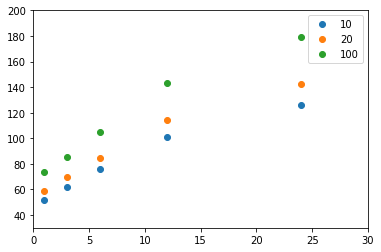

In [10]:
ag=pts.plot(style="o")
plt.xlim([0,30])
plt.ylim([30,200])

(30, 200)

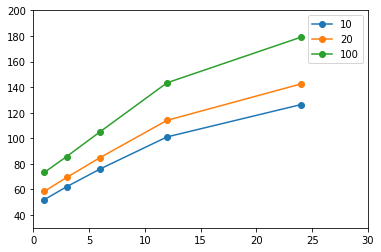

In [11]:
ag=pts.plot(style="-o")
plt.xlim([0,30])
plt.ylim([30,200])

(50, 200)

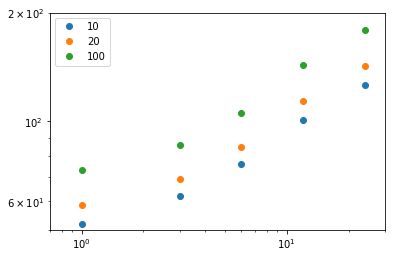

In [12]:
ag=pts.plot(style="o")
#plt.get_xaxis().get_major_formatter().set_scientific(False)
#plt.get_yaxis().get_major_formatter().set_scientific(False)
ag.set_yscale('log')
ag.set_xscale('log')
plt.xlim([0.7,30])
plt.ylim([50,200])

In [13]:
f=[1,2,3,4]
g=[1,2,3,4]
np.polyfit(f,g,1)

array([1.00000000e+00, 1.11022302e-15])

In [14]:
pts[10]

1      52.008362
3      62.124279
6      76.002430
12    101.081027
24    126.336214
Name: 10, dtype: float64

In [15]:
pts[10].index

Int64Index([1, 3, 6, 12, 24], dtype='int64')

$$ h(t_p, Tr) = a(T_r) t_p^n$$

$$\log h(t_p, Tr) = \log a(T_r) + n \log t_p $$

In [16]:
np.log(pts[10])

1     3.951405
3     4.129137
6     4.330765
12    4.615922
24    4.838947
Name: 10, dtype: float64

In [17]:
np.log(pts[10].index)

Float64Index([               0.0, 1.0986122886681098,  1.791759469228055,
              2.4849066497880004, 3.1780538303479458],
             dtype='float64')

In [18]:
in10=np.polyfit(np.log(pts[10].index),np.log(pts[10]),1)
in10

array([0.286927  , 3.88239878])

In [19]:
in10[0]

0.2869270021246384

In [20]:
in10[1]=np.exp(in10[1])
in10

array([ 0.286927  , 48.54051333])

In [21]:
in20=np.polyfit(np.log(pts[20].index),np.log(pts[20]),1)
in20[1]=np.exp(in20[1])
in20

array([ 0.2884448 , 54.37304857])

In [22]:
in100=np.polyfit(np.log(pts[100].index),np.log(pts[100]),1)
in100[1]=np.exp(in100[1])
in100

array([ 0.29089191, 67.57854615])

In [23]:
fnl=DataFrame([in10,in20,in100],index=[10,20,100],columns=["n","a"])
fnl

,n,a
10,0.286927,48.540513
20,0.288445,54.373049
100,0.290892,67.578546


In [24]:
fnl["a"][10]

48.54051333297868

In [25]:
tp=np.linspace(0.7,30,100)
tp[-5:]

array([28.81616162, 29.11212121, 29.40808081, 29.7040404 , 30.        ])

In [26]:
def h(tp,a,n):
    return a*tp**n

In [27]:
h10=h(tp,fnl["a"][10],fnl["n"][10])
h20=h(tp,fnl["a"][20],fnl["n"][20])
h100=h(tp,fnl["a"][100],fnl["n"][100])

In [28]:
inh=DataFrame([h10,h20,h100],index=["Tr = 10","Tr = 20","Tr = 100"],
              columns=tp).T
inh[:2]

,Tr = 10,Tr = 20,Tr = 100
0.700000,43.818631,49.057230,60.918488
0.995960,48.484159,54.309589,67.499006
1.291919,52.242120,58.542187,72.805855
1.587879,55.427372,62.131008,77.308098
1.883838,58.213245,65.270748,81.248774


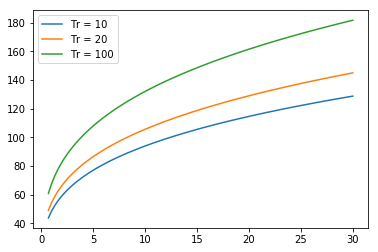

In [29]:
ag=inh.plot()

(50, 200)

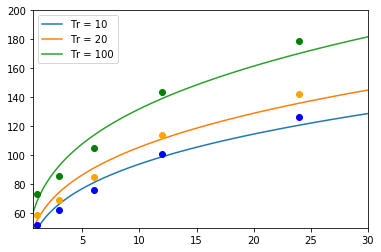

In [30]:
ag=inh.plot()
ag=plot(pts[10],"o",color="blue")
ag=plot(pts[20],"o",color="orange")
ag=plot(pts[100],"o",color="green")
#plt.get_xaxis().get_major_formatter().set_scientific(False)
#plt.get_yaxis().get_major_formatter().set_scientific(False)
#ag.set_yscale('log')
#ag.set_xscale('log')
plt.xlim([0.7,30])
plt.ylim([50,200])

(50, 200)

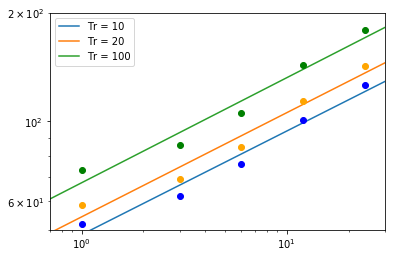

In [31]:
ag=inh.plot()
ag.set_yscale('log')
ag.set_xscale('log')
ag=plot(pts[10],"o",color="blue")
ag=plot(pts[20],"o",color="orange")
ag=plot(pts[100],"o",color="green")
#plt.get_xaxis().get_major_formatter().set_scientific(False)
#plt.get_yaxis().get_major_formatter().set_scientific(False)

plt.xlim([0.7,30])
plt.ylim([50,200])